# Recursion

Recursion is a classical algorithm, which a huge topic on its own and this is only a brief introduction. In programming, a recursive function is a function that calls itself as part of its execution. Recursion can be a useful technique for solving problems that can be divided into smaller, similar subproblems, as it allows you to break down a large, complex problem into simpler pieces and solve each piece separately. Functions can be **recursive** which means that they can call themselve from inside themselve.

Fractal or L-system are also one of the application of recursion.
![l-system](https://seresk.com/assets/img/l_fractal.png)

Here is a simple example of a recursive function in Python that calculates the factorial of a number:

In [9]:
def factorial(n):
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)

print(factorial(5)) # prints 120 (5 x 4 x 3 x 2 x 1)

120


In this example, the `factorial()` function calls itself with a value for `n` that is one less than the current value of `n`. This process continues until n is equal to `1`, at which point the function returns `1` and the recursive calls start returning their results, working their way back up the call chain.

It's important to include a base case in a recursive function, like the `if n == 1` check in the example above, to prevent the function from entering an infinite loop. Without a base case, the function would continue calling itself indefinitely.

Here is an example of a recursive function in Python that calculates the nth number in the Fibonacci sequence:

In [1]:
# Fibonacci sequence 
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(0)) # prints 0
print(fibonacci(1)) # prints 1
print(fibonacci(2)) # prints 1
print(fibonacci(3)) # prints 2
print(fibonacci(4)) # prints 3
print(fibonacci(5)) # prints 5

0
1
1
2
3
5


In [11]:
for i in range(10):
    print(fibonacci(i))

0
1
1
2
3
5
8
13
21
34


In this example, the `fibonacci()` function calls itself with values for `n` that are one and two less than the current value of `n`. This process continues until `n` is equal to 0 or 1, at which point the function returns 0 or 1, respectively. The recursive calls then start returning their results, working their way back up the call chain, and the final result is the sum of the two most recent results.

The Fibonacci sequence is a series of numbers in which each number is the sum of the two preceding ones, usually starting with 0 and 1. The first few numbers of the Fibonacci sequence are 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, and so on.

## Fractal (Sierpinski triangle)

The Sierpinski triangle is a fractal pattern that was first described by mathematician Wacław Sierpiński in 1915. It is named after him.

Sierpiński was a Polish mathematician who is known for his work on set theory, number theory, and geometry. He is particularly famous for his contributions to the study of fractals, which are self-similar geometric shapes that can be divided into smaller copies of themselves. The Sierpinski triangle is one of the simplest and most well-known examples of a fractal.

The Sierpinski triangle can be created by starting with a single equilateral triangle and recursively removing the inner triangles formed by connecting the midpoints of the sides. This process can be repeated indefinitely, resulting in a pattern with an infinite number of triangles of decreasing size. The resulting pattern is known as a Sierpinski triangle.


Here is a simple example of how you can use the Python Imaging Library (PIL) to draw a fractal pattern, in this case a Sierpinski triangle:


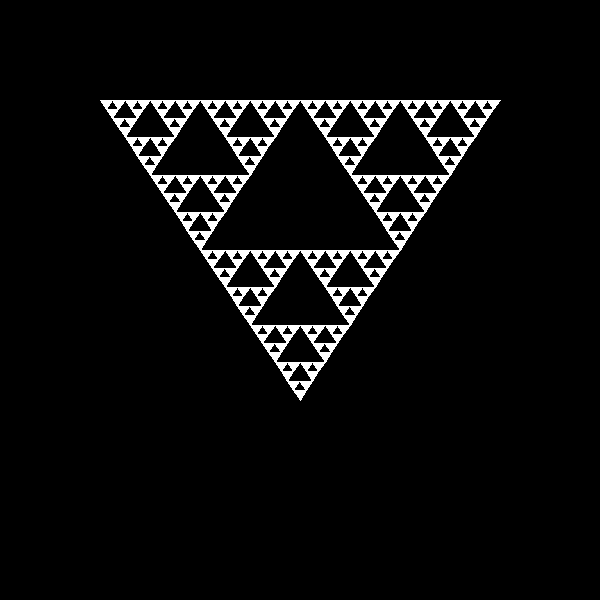

In [7]:
from PIL import Image, ImageDraw

def draw_triangle(draw, points, level):
  # Base case: draw a triangle using the given points
  if level == 0:
    draw.polygon(points, fill=(255, 255, 255))
  # Recursive case: draw three smaller triangles
  else:
    # Calculate the midpoints of the sides of the triangle
    mid_top = ((points[0][0] + points[1][0]) // 2, (points[0][1] + points[1][1]) // 2)
    mid_left = ((points[1][0] + points[2][0]) // 2, (points[1][1] + points[2][1]) // 2)
    mid_right = ((points[2][0] + points[0][0]) // 2, (points[2][1] + points[0][1]) // 2)
    # Recursively draw the three smaller triangles
    draw_triangle(draw, [points[0], mid_top, mid_right], level - 1) #top triangle
    draw_triangle(draw, [mid_top, points[1], mid_left], level - 1) #left triangle
    draw_triangle(draw, [mid_right, mid_left, points[2]], level - 1) #right triangle

# Create a blank image and a drawing object
img = Image.new("RGB", (600, 600), "black")
draw = ImageDraw.Draw(img)

# Set the initial points and recursion level for the Sierpinski triangle
points = [(100, 100), (500, 100), (300, 400)]
level = 5

# Draw the Sierpinski triangle
draw_triangle(draw, points, level)

# Save the image
#img.save("sierpinski_triangle.png")
display(img)

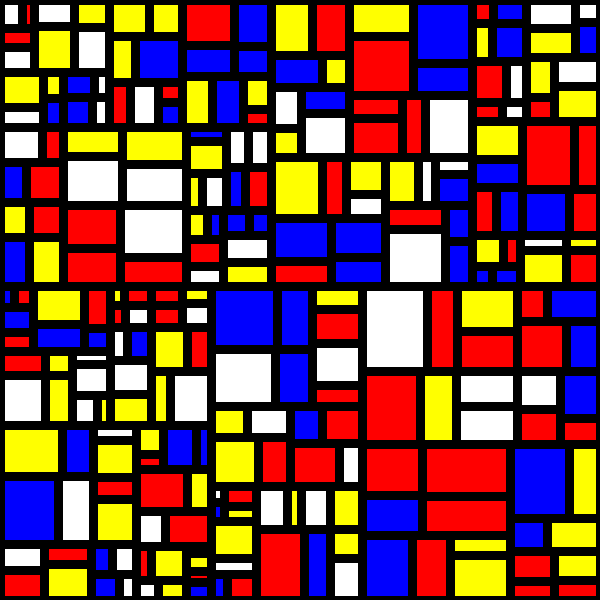

In [22]:
from PIL import Image, ImageDraw
import random


def draw_mondrian(draw, x, y, width, height, level, line_thickness=5):
    # Base case: Draw a rectangle filled with a random color and black outline
    if level == 0:
        # Randomly choose a color or leave it white
        color_choice = random.choice(
            [(255, 0, 0), (0, 0, 255), (255, 255, 0), (255, 255, 255)])
        # Draw the rectangle with a black outline
        draw.rectangle([x, y, x + width, y + height],
                       fill=color_choice, outline="black", width=line_thickness)
    else:
        # Randomly decide where to split the rectangle
        if width > height:
            # Vertical split
            split = random.randint(int(width * 0.3), int(width * 0.7))
            draw_mondrian(draw, x, y, split, height, level - 1,
                          line_thickness)               # Left part
            draw_mondrian(draw, x + split, y, width - split,
                          height, level - 1, line_thickness)  # Right part
        else:
            # Horizontal split
            split = random.randint(int(height * 0.3), int(height * 0.7))
            draw_mondrian(draw, x, y, width, split, level - 1,
                          line_thickness)                 # Top part
            draw_mondrian(draw, x, y + split, width, height -
                          split, level - 1, line_thickness)  # Bottom part


# Create a blank image and a drawing object
img = Image.new("RGB", (600, 600), "white")
draw = ImageDraw.Draw(img)

# Set initial position, size, and recursion level
x, y = 0, 0
width, height = 600, 600
level = 8  # You can increase or decrease this level for more/less complexity

# Draw the Mondrian-style recursive pattern with black borders
draw_mondrian(draw, x, y, width, height, level)

# Display the image
display(img)

## Binary Search 

Binary search is an algorithm that is used to search for a specific value in a **sorted list**. It works by dividing the list in half and comparing the value to the element at the midpoint of the list. If the value is greater than the element at the midpoint, the algorithm searches the right half of the list. If the value is less than the element at the midpoint, the algorithm searches the left half of the list. This process is repeated until the value is found or it is determined that the value is not in the list.

Binary search is an efficient algorithm for searching large lists because it reduces the search space by half at each step. This means that the worst-case time complexity of binary search is **O(log n)**, where n is the size of the list. This is much faster than a linear search, which has a worst-case time complexity of **O(n)**.

To use binary search, **the list must be sorted** in ascending order. If the list is not sorted, it must be sorted before binary search can be used.

- Example of time complexity based on `sequential search` and `binary search`

![](data/binary-search.gif)

Here is an example of a binary search function that uses recursion to search for a specific value in a sorted list:

In [4]:
def binary_search(lst, value, low=0, high=None):
    # Set the initial high index
    if high is None:
        high = len(lst) - 1
    
    # Check if the value is not in the list
    if low > high:
        return None
    
    # Calculate the midpoint of the list
    mid = (low + high) // 2
    print(f"low: {low}\t high{high}")

    # Check if the value is at the midpoint
    if lst[mid] == value:
        return mid    
    # Recursively search the left or right half of the list
    elif lst[mid] > value:
        # Search the left half
        new_high = mid - 1
        return binary_search(lst, value, low, new_high)
    else:
        # Search the right half
        new_low = mid + 1
        return binary_search(lst, value, new_low, high)

# Test the binary search function
lst = [1, 3, 4, 6, 8, 9, 11]
print(binary_search(lst, 4)) # Output: 2
print(binary_search(lst, 7)) # Output: None
print(binary_search(lst, 11)) # Output: 6

low: 0	 high6
low: 0	 high2
low: 2	 high2
2
low: 0	 high6
low: 4	 high6
low: 4	 high4
None
low: 0	 high6
low: 4	 high6
low: 6	 high6
6


This code defines a function called draw_triangle() that uses a recursive algorithm to draw a Sierpinski triangle using a PIL drawing object, a list of points representing the vertices of the triangle, and a recursion level. The function works by defining a base case and a recursive case: the base case simply draws a triangle using the given points, and the recursive case calculates the midpoints of the sides of the triangle and then recursively calls itself to draw three smaller triangles using these midpoints as the vertices.

# L-system

L-systems are a type of formal grammar used in computer science and biology to describe patterns and structures in nature, such as the branching patterns of trees or the growth patterns of plants. They are named after the Swedish mathematician and computer scientist Henrik W. Lenz, who first introduced them in the 1960s.

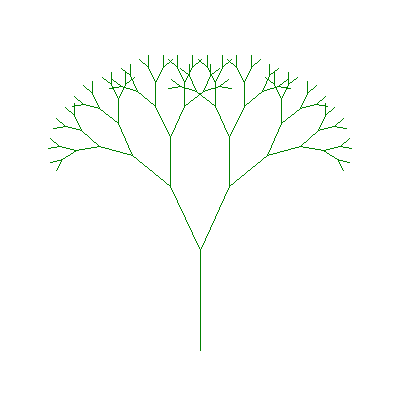

In [29]:
from PIL import Image, ImageDraw
import math


def draw_tree(draw, x, y, angle, length, depth):
    if depth == 0:
        return

    # Calculate the end coordinates of the branch
    x_end = x + length * math.cos(math.radians(angle))
    y_end = y + length * math.sin(math.radians(angle))

    # Draw the branch
    draw.line([(x, y), (x_end, y_end)], fill="green", width=1)

    # Recursive branching
    new_length = length * 0.7  # Reduce length for each recursive branch
    draw_tree(draw, x_end, y_end, angle - 25,
              new_length, depth - 1)  # Left branch
    draw_tree(draw, x_end, y_end, angle + 25,
              new_length, depth - 1)  # Right branch


# Set up the image and drawing parameters
img = Image.new("RGB", (400, 400), "white")
draw = ImageDraw.Draw(img)

# Initial parameters for the tree
start_x, start_y = 200, 350  # Starting position near the bottom center
initial_angle = -90          # Start facing upward
initial_length = 100         # Initial branch length
depth = 7                    # Recursion depth for complexity

# Draw the tree
draw_tree(draw, start_x, start_y, initial_angle, initial_length, depth)

# Display the image
display(img)

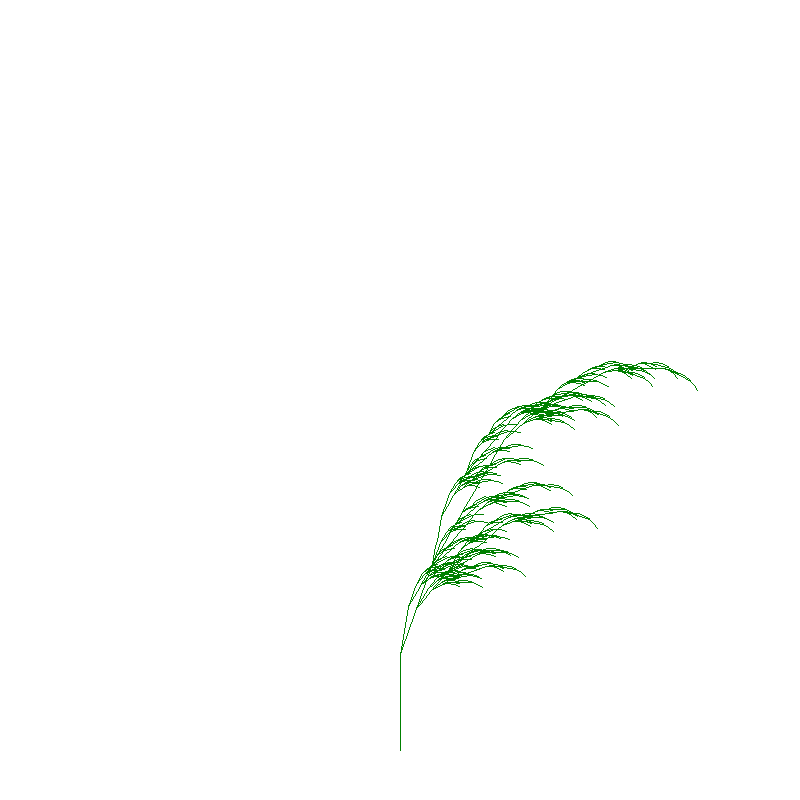

In [1]:
from PIL import Image, ImageDraw
import math

# Define the L-system rules and recursive function


def apply_rules(axiom, rules, depth):
    if depth == 0:
        return axiom
    else:
        new_axiom = ''.join(rules.get(char, char) for char in axiom)
        return apply_rules(new_axiom, rules, depth - 1)

# Draw the L-system based on the generated string


def draw_lsystem(draw, instructions, start_x, start_y, angle, length, initial_angle):
    x, y = start_x, start_y
    current_angle = initial_angle
    stack = []

    for command in instructions:
        if command == 'F':
            # Calculate the new position
            new_x = x + length * math.cos(math.radians(current_angle))
            new_y = y + length * math.sin(math.radians(current_angle))
            # Draw the line
            draw.line([(x, y), (new_x, new_y)], fill="green", width=1)
            # Update position
            x, y = new_x, new_y
        elif command == '+':
            # Turn right
            current_angle -= angle
        elif command == '-':
            # Turn left
            current_angle += angle
        elif command == '[':
            # Save the current state
            stack.append((x, y, current_angle))
        elif command == ']':
            # Restore the last saved state
            x, y, current_angle = stack.pop()


# Set up the image and L-system parameters
img = Image.new("RGB", (800, 800), "white")
draw = ImageDraw.Draw(img)
# Define the initial axiom, rules, and parameters
# X represents a branch tip that can grow and split into new branches
# F represents a branch segment that draws a line and can grow longer
axiom = "X"  # Start with a single branch tip
rules = {
    "X": "F-[[X]-X]-F[-FX]+X",  # Branch tip grows into complex branching pattern
    "F": "FF"  # Branch segment grows longer by doubling
}
depth = 5
angle = 10
length = 6

# Generate the L-system string based on the depth
instructions = apply_rules(axiom, rules, depth)

# Draw the L-system tree
draw_lsystem(draw, instructions, start_x=400, start_y=750,
             angle=angle, length=length, initial_angle=-90)

# Show the image
display(img)


# Addition: Fireworks!

In [11]:
from PIL import Image, ImageDraw
import random
import math
import time
particles = []

class Particle:
    def __init__(self, _pos, _angle, _radius,_color):
        self.pos = _pos
        self.ppos = _pos
        self.angle = _angle
        self.radius = _radius
        self.color = _color
        
    def move(self):
        self.pos = (self.pos[0]+self.radius*math.cos(math.radians(self.angle)), self.pos[1]+self.radius*math.sin(math.radians(self.angle)))
        self.radius *= 0.975
        if (random.randint(0,10)>7.5):
            particles.append(Particle(self.pos, self.angle+random.randint(-45, 45), self.radius, (255, 255, 255)))
        
    def show(self,img_lines):
        shape = [self.pos,self.ppos]
        img_lines.line(shape,fill = self.color,width=1)
        self.ppos = self.pos
        
        
particles.append(Particle((200,400),270,10,(255,255,255)))

# creating new Image object
img = Image.new("RGB", (400, 400))
  
# create line image
img_lines = ImageDraw.Draw(img)  
gif = []

for i in range(100):
    #time.sleep(0.1)
    for p in particles:
        p.move()
        p.show(img_lines)
        if p.radius < 4:
            particles.remove(p)
    gif.append(img.copy())
    
    
gif[0].save('temp.gif',
               save_all = True, append_images = gif[1:], 
               optimize = False, duration = 20,loop=0)
               
#animated_gif = Image.open("temp.gif")
#Image(url='example.gif')
# img.show()

this is the output in markdown:

![](temp.gif)